In [2]:
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
import pandas as pd

Using TensorFlow backend.


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
import scipy
matplotlib.rcParams['figure.figsize'] = [15, 15]

In [4]:
import keras
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Input, Softmax
from keras.layers import Conv2D, MaxPooling2D, SeparableConv2D
from keras.layers import LeakyReLU

In [24]:
image_gen = ImageDataGenerator(validation_split=0.15, rescale=1.0/255.0, width_shift_range=0, height_shift_range=0, zoom_range=0.1)
dataframe = pd.read_csv("characters/labels.txt", delim_whitespace=True)
all_dataframe = pd.read_csv("../assets/data/characters/labels.txt", delim_whitespace=True)

In [25]:
training_generator = image_gen.flow_from_dataframe(
    dataframe=all_dataframe, 
    directory="../assets/data/characters/",
    x_col="filename",
    y_col="category",
    subset="training",
    batch_size=20,
    classes=None,
    class_mode="categorical",
    shuffle=True,
    target_size=(36, 36)
)

Found 5495 validated image filenames belonging to 26 classes.


In [26]:
validation_generator = image_gen.flow_from_dataframe(
    dataframe=all_dataframe, 
    directory="../assets/data/characters/",
    x_col="filename",
    y_col="category",
    subset="validation",
    batch_size=20,
    classes=None,
    class_mode="categorical",
    shuffle=True,
    target_size=(36, 36)
)

Found 969 validated image filenames belonging to 26 classes.


In [104]:
input_shape = (36, 36, 3)
alpha = 0.2

inputs = Input(shape=input_shape)

x = Conv2D(16, (3, 3))(inputs)
x = LeakyReLU(alpha)(x)
x = MaxPooling2D((2, 2))(x)

x = SeparableConv2D(32, (3, 3))(x)
x = LeakyReLU(alpha)(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3))(x)
x = LeakyReLU(alpha)(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)

x = Dense(64)(x)
x = LeakyReLU(alpha)(x)

x = Dense(26, activation="softmax")(x)
outputs = x

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer=keras.optimizers.Adam(lr=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [14]:
model = keras.models.load_model("characters.h5")

In [15]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 36, 36, 3)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 16)        448       
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 34, 34, 16)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 17, 17, 16)        0         
_________________________________________________________________
separable_conv2d_13 (Separab (None, 15, 15, 32)        688       
_________________________________________________________________
leaky_re_lu_41 (LeakyReLU)   (None, 15, 15, 32)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 7, 7, 32)          0   

In [27]:
steps_per_epoch = training_generator.n//training_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

model.fit_generator(
    generator=training_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=10,
)

Epoch 1/10
274/274 [==============================] - 11s 41ms/step - loss: 0.0343 - accuracy: 0.9870 - val_loss: 0.0185 - val_accuracy: 0.9875
Epoch 2/10
274/274 [==============================] - 10s 38ms/step - loss: 0.0314 - accuracy: 0.9881 - val_loss: 0.1265 - val_accuracy: 0.9895
Epoch 3/10
274/274 [==============================] - 10s 37ms/step - loss: 0.0291 - accuracy: 0.9903 - val_loss: 0.0103 - val_accuracy: 0.9852
Epoch 4/10
274/274 [==============================] - 12s 43ms/step - loss: 0.0265 - accuracy: 0.9911 - val_loss: 4.7270e-04 - val_accuracy: 0.9895
Epoch 5/10
274/274 [==============================] - 11s 39ms/step - loss: 0.0303 - accuracy: 0.9887 - val_loss: 0.0112 - val_accuracy: 0.9863
Epoch 6/10
274/274 [==============================] - 11s 40ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0049 - val_accuracy: 0.9810
Epoch 7/10
274/274 [==============================] - 11s 41ms/step - loss: 0.0229 - accuracy: 0.9932 - val_loss: 0.0922 - val_accur

In [28]:
model.save("characters.h5")
model.save("../assets/models/characters.h5")

[[9.99999046e-01 7.41646744e-08 5.40866377e-16 3.24133542e-13
  1.93547587e-12 1.46949293e-11 1.65606955e-11 2.15481366e-09
  5.79565883e-16 2.32341316e-12 3.16586579e-08 6.45167567e-13
  8.03118239e-10 9.89308457e-09 3.78676951e-19 4.98129142e-11
  9.75087041e-18 5.87235989e-12 1.24009210e-16 8.04343910e-23
  9.32953714e-12 1.00530749e-12 7.79565994e-07 9.39974210e-10
  2.82017200e-18 1.13077128e-17]
 [4.81913847e-15 1.41967345e-08 4.43187431e-11 2.12721751e-09
  1.71031557e-11 1.24270212e-12 5.81735788e-12 6.72699405e-17
  9.64479049e-19 1.50471419e-06 3.86131192e-15 1.16958136e-12
  6.95800456e-16 4.49726194e-23 6.61840076e-08 8.01243971e-07
  2.17193125e-12 1.60239072e-10 1.28524553e-18 2.04131689e-09
  3.90125376e-17 5.31058265e-16 7.51266674e-17 1.94323291e-09
  4.18085372e-10 9.99997616e-01]]
[ 0 25]


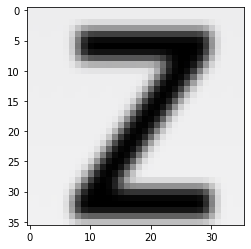

In [29]:
other_image = cv2.imread("../assets/data/characters/sample_0.png")
image = cv2.imread("../assets/data/characters/sample_4705.png")
data = np.array([other_image/255.0, image/255.0])
prediction = model.predict(data)
print(prediction)
print(np.argmax(prediction, axis=1))
plt.imshow(image)